In [1]:
import os
os.chdir("C:/Users/Pooja Kathe/Desktop/linear_regression dataset")
import pandas as pd

airpas=pd.read_csv("AirPassengers (1).csv")

In [2]:
airpas.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
airpas.tail(20)

,Month,Passengers
124,1959-05,420
125,1959-06,472
126,1959-07,548
127,1959-08,559
128,1959-09,463
129,1959-10,407
130,1959-11,362
131,1959-12,405
132,1960-01,417
133,1960-02,391


In [4]:
airpas.Month=pd.to_datetime(airpas.Month,infer_datetime_format=True)

In [5]:
ind_airpas=airpas.set_index(['Month'])

In [6]:
ind_airpas.head(2)

,Passengers
Month,
1949-01-01,112
1949-02-01,118


In [7]:
ind_airpas.shape

(144, 1)

In [8]:
import matplotlib.pyplot as plt

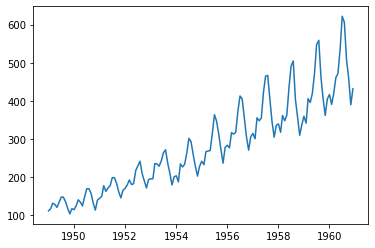

In [9]:
plt.plot(ind_airpas);

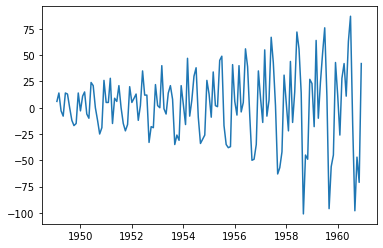

In [10]:
plt.plot(ind_airpas.diff())

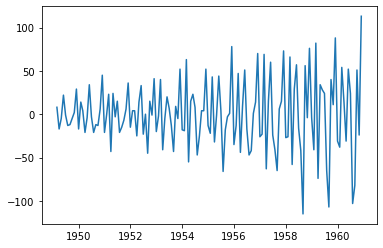

In [11]:
plt.plot(ind_airpas.diff().diff())

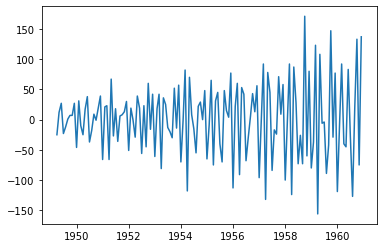

In [12]:
plt.plot(ind_airpas.diff().diff().diff())

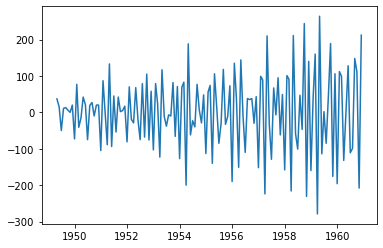

In [13]:
plt.plot(ind_airpas.diff().diff().diff().diff()) 

In [14]:
# Even after doing differencing more than 10 times series was not stationary.
# take a log

In [15]:
import numpy as np

In [16]:
ind_airpas_log=np.log(ind_airpas)

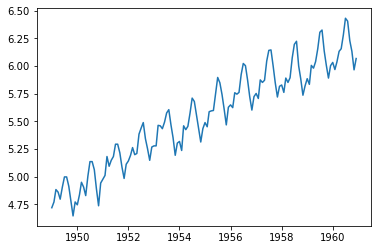

In [17]:
plt.plot(ind_airpas_log)

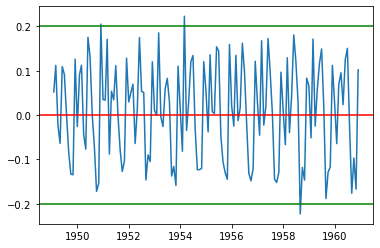

In [18]:
plt.plot(ind_airpas_log.diff())
plt.axhline(y=0,color='r')
plt.axhline(y=.2,color='g')
plt.axhline(y=-.2,color='g')


In [19]:
#Note: I is 1 cuz we make one level of differencing.
# But my original series has changed. Now my base series is log.
# Model would be build on log so prediction also in log so at the end take the anti log.

In [20]:
#but whatever values u get from ACF and PACF are not binding.

In [21]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

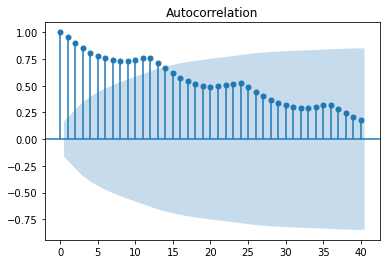

In [23]:
plot_acf(ind_airpas_log.Passengers,lags=40);

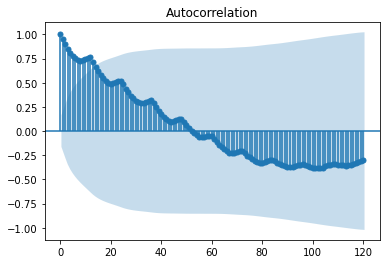

In [24]:
plot_acf(ind_airpas_log.Passengers,lags=120);

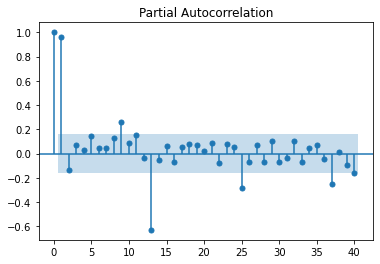

In [25]:
plot_pacf(ind_airpas_log.Passengers,lags=40);

In [26]:
# In PACF after lag 2 there is sudden decline so the value of P is 2
# In ACF there is no sudden decline so the value of q is 0

In [27]:
model=ARIMA(ind_airpas_log,order=(2,1,0))
result=model.fit();

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

In [28]:
ind_airpas_log.head()

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [29]:
result.params #params are parameters p is 2 so we got 2 AR values and q is 0 so we dont have MA value.

const                 0.009600
ar.L1.D.Passengers    0.235864
ar.L2.D.Passengers   -0.172474
dtype: float64

In [30]:
result.forecast(steps=12)  #It will do the forecast for next 12 time periods in this case next 12 months

(array([6.13038727, 6.13635266, 6.13606418, 6.14395853, 6.15486154,
        6.16506287, 6.17457977, 6.18405628, 6.19364129, 6.20325887,
        6.21286541, 6.22246373]),
 array([0.10248369, 0.16292525, 0.1992398 , 0.2264801 , 0.25095756,
        0.27376969, 0.29490959, 0.31457336, 0.33305177, 0.35056068,
        0.36724062, 0.38319578]),
 array([[5.92952293, 6.33125161],
        [5.81702505, 6.45568028],
        [5.74556135, 6.52656701],
        [5.70006568, 6.58785137],
        [5.66299377, 6.64672931],
        [5.62848413, 6.7016416 ],
        [5.59656759, 6.75259196],
        [5.56750382, 6.80060873],
        [5.54087182, 6.84641076],
        [5.51617256, 6.89034517],
        [5.49308703, 6.93264379],
        [5.4714138 , 6.97351366]]))

In [31]:
fore_values=result.forecast(steps=12) #It will do the forecast for next 12 time periods in this case next 12 months

In [32]:
fore_values[0] #Forecast values

array([6.13038727, 6.13635266, 6.13606418, 6.14395853, 6.15486154,
       6.16506287, 6.17457977, 6.18405628, 6.19364129, 6.20325887,
       6.21286541, 6.22246373])

In [33]:
fore_values[1] # Standard error in forecast

array([0.10248369, 0.16292525, 0.1992398 , 0.2264801 , 0.25095756,
       0.27376969, 0.29490959, 0.31457336, 0.33305177, 0.35056068,
       0.36724062, 0.38319578])

In [34]:
np.round(np.exp(fore_values[0])) #taking antilog (prediction in original scale)

array([460., 462., 462., 466., 471., 476., 480., 485., 490., 494., 499.,
       504.])

In [35]:
# we cannot find error cuz forecast is for future values and we do not have the actual values for

In [36]:
# we cannot do random sampling but we can do sequential sampling
# build the model till 1959 and do forecast on 1960

In [37]:
forecast_values=result.forecast(steps=12)

In [38]:
forecast_values_df=pd.DataFrame(forecast_values[0])
forecast_values_df=np.exp(forecast_values_df)
forecast_values_df

,0
0,459.614121
1,462.364094
2,462.230729
3,465.894179
4,471.001623
5,475.831056
6,480.381113
7,484.955083
8,489.625733
9,494.357464


In [39]:
forecast_values_df.rename(columns={forecast_values_df.columns[0]:'Predicted'},inplace=True)

In [40]:
date_for_pred = ['1961-01-01'  , '1961-02-01' ,
                 '1961-03-01', '1961-04-01','1961-05-01', 
                 '1961-06-01', '1961-07-01','1961-08-01',
                 '1961-09-01', '1961-10-01','1961-11-01',
                 '1961-12-01']

In [41]:
forecast_values_df  = pd.concat([forecast_values_df , pd.Series(date_for_pred )] , axis = 1)
forecast_values_df

,Predicted,0
0,459.614121,1961-01-01
1,462.364094,1961-02-01
2,462.230729,1961-03-01
3,465.894179,1961-04-01
4,471.001623,1961-05-01
5,475.831056,1961-06-01
6,480.381113,1961-07-01
7,484.955083,1961-08-01
8,489.625733,1961-09-01
9,494.357464,1961-10-01


In [42]:
forecast_values_df.rename(columns= {forecast_values_df.columns[1] : 'Month'} , inplace = True) 


In [43]:
forecast_values_df.Month  = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True ) 
forecast_values_df

,Predicted,Month
0,459.614121,1961-01-01
1,462.364094,1961-02-01
2,462.230729,1961-03-01
3,465.894179,1961-04-01
4,471.001623,1961-05-01
5,475.831056,1961-06-01
6,480.381113,1961-07-01
7,484.955083,1961-08-01
8,489.625733,1961-09-01
9,494.357464,1961-10-01


In [44]:
pred_airpas = forecast_values_df.set_index(['Month'])
pred_airpas.head()

,Predicted
Month,
1961-01-01,459.614121
1961-02-01,462.364094
1961-03-01,462.230729
1961-04-01,465.894179
1961-05-01,471.001623


<AxesSubplot:xlabel='Month'>

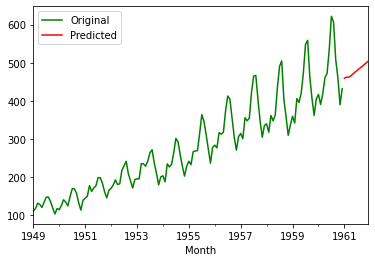

In [45]:
ind_airpas['Passengers'].plot(legend = True , label = "Original" , color ="green")  # original
pred_airpas['Predicted'].plot(legend = True , label = "Predicted" , color ="red") # predicted 

### train test split

In [46]:
airpas=pd.read_csv("AirPassengers (1).csv")
airpas.Month=pd.to_datetime(airpas.Month,infer_datetime_format=True)
ind_airpas=airpas.set_index(['Month'])

In [47]:
train=ind_airpas.iloc[0:132]   ## 1is 11 year
test=ind_airpas.iloc[132:144]   ## last year 1960

<AxesSubplot:xlabel='Month'>

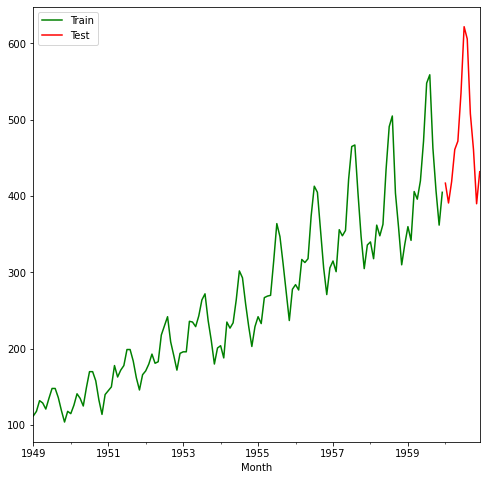

In [48]:
plt.figure(figsize =(8 , 8))
train['Passengers'].plot(legend = True , label = "Train" , color ="green")
test['Passengers'].plot(legend = True , label = "Test" , color ="red")



In [49]:
train_log=np.log(train)

In [50]:
model=ARIMA(train_log,order=(8,1,2))
result=model.fit()
forecast_values=result.forecast(steps=24)
forecast_values
forecast_values[0]

forecast_values_df=pd.DataFrame(forecast_values[0])
forecast_values_df

forecast_values_df=np.exp(forecast_values_df)   ## antilog

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

LinAlgError: SVD did not converge

In [ ]:
forecast_values_df

In [ ]:
date_for_pred = ['1960-01-01'  , '1960-02-01' ,
                 '1960-03-01', '1960-04-01','1960-05-01', 
                 '1960-06-01', '1960-07-01','1960-08-01',
                 '1960-09-01', '1960-10-01','1960-11-01',
                 '1960-12-01',
                   '1961-01-01'  , '1961-02-01' ,
                 '1961-03-01', '1961-04-01','1961-05-01', 
                 '1961-06-01', '1961-07-01','1961-08-01',
                 '1961-09-01', '1961-10-01','1961-11-01',
                 '1961-12-01']

In [ ]:
forecast_values_df = pd.concat([ pd.Series(date_for_pred ) , forecast_values_df] , axis = 1)

In [ ]:
l1 = [ 'Month' , 'Passengers']

In [ ]:
forecast_values_df.columns= l1

In [ ]:
forecast_values_df.head()

In [ ]:
forecast_values_df.Month = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True )


forecast_values_df = forecast_values_df.set_index(['Month'])



In [ ]:
plt.figure(figsize =(7 , 7))
test['Passengers'].plot(legend = True , label = "Test" , color ="red")
train['Passengers'].plot(legend = True , label = "Train" , color ="green")
forecast_values_df['Passengers'].plot(legend = True , label = "Predicted" , color ="blue")

## we can see that predicted values are not in line(do not follow the pattren of atuals)

In [ ]:
## MSC
error=test["Passengers"] -forecast_values_df["Passengers"]

In [ ]:
MSE210 =np.mean(np.square(error))  ## this MSE for the 8,1,2
MSE210

### SARIMA  with auto ARIMA

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
from statsmodels.tsa.seasonal  import seasonal_decompose
import pmdarima

from pmdarima import auto_arima

In [2]:
#! pip install pmdarima

In [10]:
import pandas as pd
import os
import numpy as np

In [11]:
os.chdir("C:/Users/Pooja Kathe/Desktop/linear_regression dataset")
airpas=pd.read_csv("AirPassengers (1).csv")
airpas.Month=pd.to_datetime(airpas.Month,infer_datetime_format=True)
ind_airpas=airpas.set_index(['Month'])

In [12]:
ind_airpas_log=np.log(ind_airpas)

In [13]:
result=seasonal_decompose(ind_airpas_log)

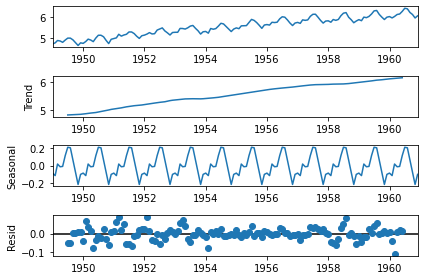

In [14]:
result.plot();

In [15]:
## auto arima and than sarim


In [18]:
auto_arima(ind_airpas_log,seasonal=True,m=12)
## it can give slightly differnt results
## it will try to find the best combination of P,d,q and s

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [24]:
model_sarima=SARIMAX(ind_airpas_log,order=(2, 0, 0),seasonal_order=(0, 1, 1, 12))
result=model_sarima.fit()

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [30]:
result.predict()

1949-01-01    0.000000e+00
1949-02-01    7.480193e-08
1949-03-01    1.488976e-07
1949-04-01    2.221204e-07
1949-05-01    2.926570e-07
                  ...     
1960-08-01    6.436318e+00
1960-09-01    6.238291e+00
1960-10-01    6.096919e+00
1960-11-01    5.991716e+00
1960-12-01    6.083719e+00
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64

In [36]:
pred=np.exp(result.predict(start=132,end=143) )   ## last 1 year sesult 1960

In [37]:
pred

1960-01-01    419.474915
1960-02-01    397.312403
1960-03-01    458.613762
1960-04-01    419.736974
1960-05-01    459.888285
1960-06-01    547.595634
1960-07-01    611.411705
1960-08-01    624.104872
1960-09-01    511.982595
1960-10-01    444.485998
1960-11-01    400.100538
1960-12-01    438.657369
Freq: MS, Name: predicted_mean, dtype: float64

In [40]:
import matplotlib.pyplot as plt

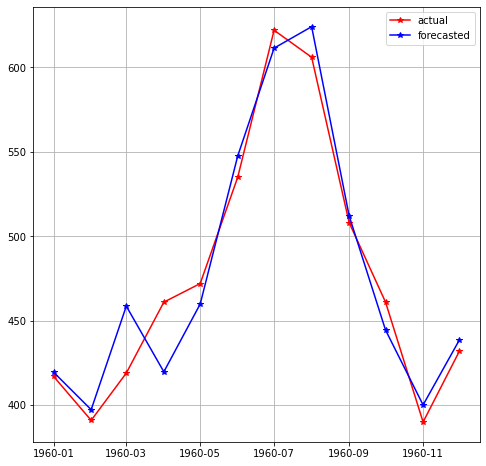

In [42]:
plt.figure(figsize=(8,8))
plt.plot(ind_airpas[132:144],marker="*",color="r",label="actual")
plt.plot(pred,color="b",label="forecasted",marker="*")
plt.legend()
plt.grid()

In [48]:
## MSC
error=ind_airpas.Passengers[132:144] -pred

In [49]:
error

Month
1960-01-01    -2.474915
1960-02-01    -6.312403
1960-03-01   -39.613762
1960-04-01    41.263026
1960-05-01    12.111715
1960-06-01   -12.595634
1960-07-01    10.588295
1960-08-01   -18.104872
1960-09-01    -3.982595
1960-10-01    16.514002
1960-11-01   -10.100538
1960-12-01    -6.657369
dtype: float64

In [53]:
MSE=np.mean(np.square(error))  ## this MSE for sarima
MSE                            ## by using sarima MSe redues

374.834659289572

In [52]:
rmsc=np.sqrt(MSE)

In [54]:
rmsc

19.36064718157872

In [55]:
pred_fur=np.exp(result.predict(start=144,end=155) )   ## last 1 year sesult 1960

In [58]:
pred_fur                                                ### predicted for 1961

1961-01-01    447.510128
1961-02-01    422.222647
1961-03-01    474.381312
1961-04-01    487.121480
1961-05-01    502.939938
1961-06-01    575.523071
1961-07-01    660.227472
1961-08-01    656.438667
1961-09-01    548.514714
1961-10-01    488.001638
1961-11-01    421.333020
1961-12-01    467.145592
Freq: MS, Name: predicted_mean, dtype: float64

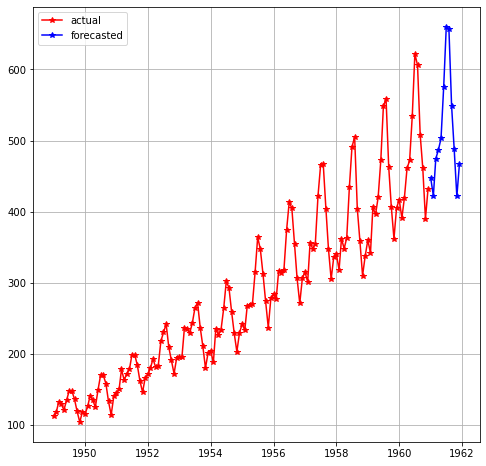

In [57]:
plt.figure(figsize=(8,8))
plt.plot(ind_airpas,marker="*",color="r",label="actual")
plt.plot(pred_fur,color="b",label="forecasted",marker="*")
plt.legend()
plt.grid()